In [1]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib as mpl
#import multiprocess as mp
#import multiprocess
#num_cores = mp.cpu_count()
import higlass as hg
from scipy.stats import spearmanr
import numpy as np
import pandas as pd
import bioframe
import cooltools
import cooler

from cooltools.lib.numutils import adaptive_coarsegrain
from cooltools.lib.plotting import *

from mpl_toolkits import axes_grid1

#import pysam
genome_folder = '/project/fudenber_735/genomes/mm10/'
genome_fasta = genome_folder+'mm10.fa'
genome_chromsizes = genome_folder+'mm10.chrom.sizes.reduced'

In [2]:
bonev_file = '/project/fudenber_735/GEO/bonev_2017_GSE96107/distiller-0.3.1_mm10/results/coolers/HiC_ES.mm10.mapq_30.1000.mcool'
bonev_cooler = cooler.Cooler(bonev_file+'::resolutions/10000')
res = 10_000

/tmp/SLURM_24088606/ipykernel_6632/3211996522.py:7: RuntimeWarning: divide by zero encountered in log10
  im = plt.matshow(np.log10(cname),


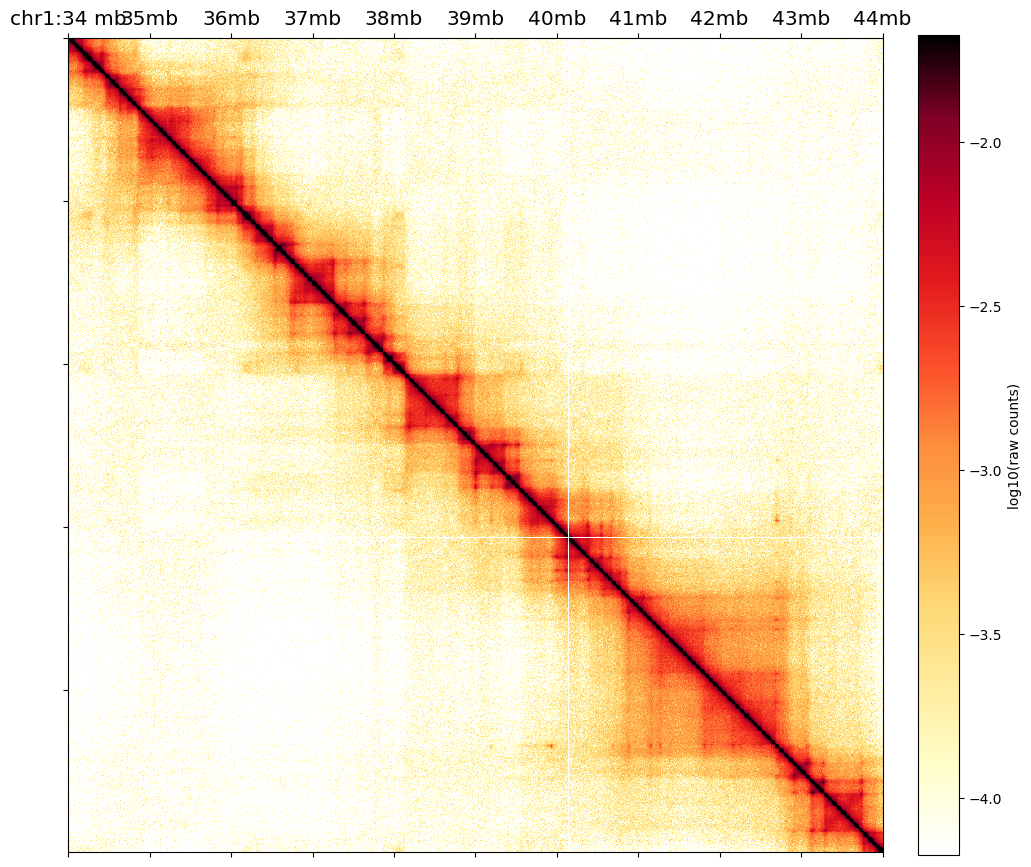

In [3]:
plt.figure(figsize=(11.5,11.5))

region = 'chr1:34000000-44000000'

cname = (cooler.Cooler(bonev_file+'::resolutions/'+str(res)).matrix(balance=True).fetch(region))
mat=cname
im = plt.matshow(np.log10(cname), 
                 vmax = np.log10(np.nanmedian(np.diag(mat,2))), 
                 vmin= np.log10(np.nanmedian(np.diag(mat,2)))-2.5, 
                 fignum=False ,cmap='fall' ); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.xticks([0,100,200,300,400,500, 600, 700, 800, 900, 1000],fontsize=14.5)
#plt.yticks([0,100,200,300,400,500],fontsize=8.1)
plt.gca().set_xticklabels(['chr1:34 mb', '35mb', '36mb','37mb','38mb', '39mb', '40mb', '41mb', '42mb', '43mb', '44mb'])
#plt.gca().set_yticklabels(['0Mb', '0.25Mb', '0.5Mb','0.75Mb','1Mb', '1.25Mb'])#plt.gca().set_yticklabels([])
plt.gca().set_yticklabels([])
plt.savefig('chrdomain.png')
plt.show()

In [36]:
### importing ctcf motifs ###
direct='/project/fudenber_735/motifs/mm10/jaspar/MA0139.1.tsv.gz'
motif=bioframe.read_table(direct)
motif=motif.rename(columns={0: 'chrom', 1: 'start',2:'end',3:'name',4:'score',5:'pval',6:'strand'})

In [44]:
motif

chrom     start       end  name  score  pval strand
0       chr10   3103662   3103681  CTCF    814   410      -
1       chr10   3108121   3108140  CTCF    859   504      -
2       chr10   3119020   3119039  CTCF    801   386      -
3       chr10   3124081   3124100  CTCF    807   397      -
4       chr10   3127081   3127100  CTCF    810   403      +
...       ...       ...       ...   ...    ...   ...    ...
825505   chrY  90829177  90829196  CTCF    842   465      +
825506   chrY  90839573  90839592  CTCF    804   392      +
825507   chrY  90839785  90839804  CTCF    885   565      -
825508   chrY  90839787  90839806  CTCF    842   465      +
825509   chrY  90844314  90844333  CTCF    822   426      +

[825510 rows x 7 columns]

In [61]:
###importing ctcf peaks ####
ctcf_path='/project/fudenber_735/collaborations/karissa_2022/2022_09_features_for_RNAseq/ChIP-seq_in_WT-parental-E14'
ctcf = bioframe.read_table(ctcf_path+'/CTCF_peaks_called_on_4reps_foundInatLeast2reps_noBlacklist.bed', schema='bed')#.query(f'chrom in {clr.chromnames}')

### importing ctcf motifs ###
direct='/project/fudenber_735/motifs/mm10/jaspar/MA0139.1.tsv.gz'
motif=bioframe.read_table(direct)
motif=motif.rename(columns={0: 'chrom', 1: 'start',2:'end',3:'name',4:'score',5:'pval',6:'strand'})

### overlap between peaks and motifs### 
peaks_motifs = bioframe.overlap(ctcf,motif,how='inner')
peaks_motifs=peaks_motifs.rename(columns={'strand':'strand_','strand_':'strand'})
peaks_motifs=peaks_motifs[['chrom','start','end','strand','score']]

In [63]:
peaks_motifs

chrom      start        end strand      score
0       chr2    3118013    3118595      +  115.27917
1       chr2    3176031    3176357      -   53.09579
2       chr2    3228474    3229464      -   87.70425
3       chr2    3327364    3327779      -   79.91960
4       chr2    3327364    3327779      +   79.91960
...      ...        ...        ...    ...        ...
55068  chr15   85111910   85112299      +   40.43705
55069  chr15   97992399   97992672      +   17.87247
55070  chr15  101240667  101241191      +  115.02845
55071  chr15  101283634  101284182      -  122.56929
55072  chr15  101387211  101387542      -   21.08840

[55073 rows x 5 columns]

In [60]:
ctcf_filtered

chrom      start        end strand
0       chr2    3118013    3118595      +
4       chr2    3327364    3327779      +
5       chr2    3348935    3349312      +
7       chr2    3517210    3517511      +
8       chr2    3546579    3546944      +
...      ...        ...        ...    ...
55065  chr15   79148497   79149013      +
55067  chr15   80216104   80216567      +
55068  chr15   85111910   85112299      +
55069  chr15   97992399   97992672      +
55070  chr15  101240667  101241191      +

[27582 rows x 4 columns]

/tmp/SLURM_24088606/ipykernel_6632/1897415450.py:7: RuntimeWarning: divide by zero encountered in log10
  im = plt.matshow(np.log10(cname),


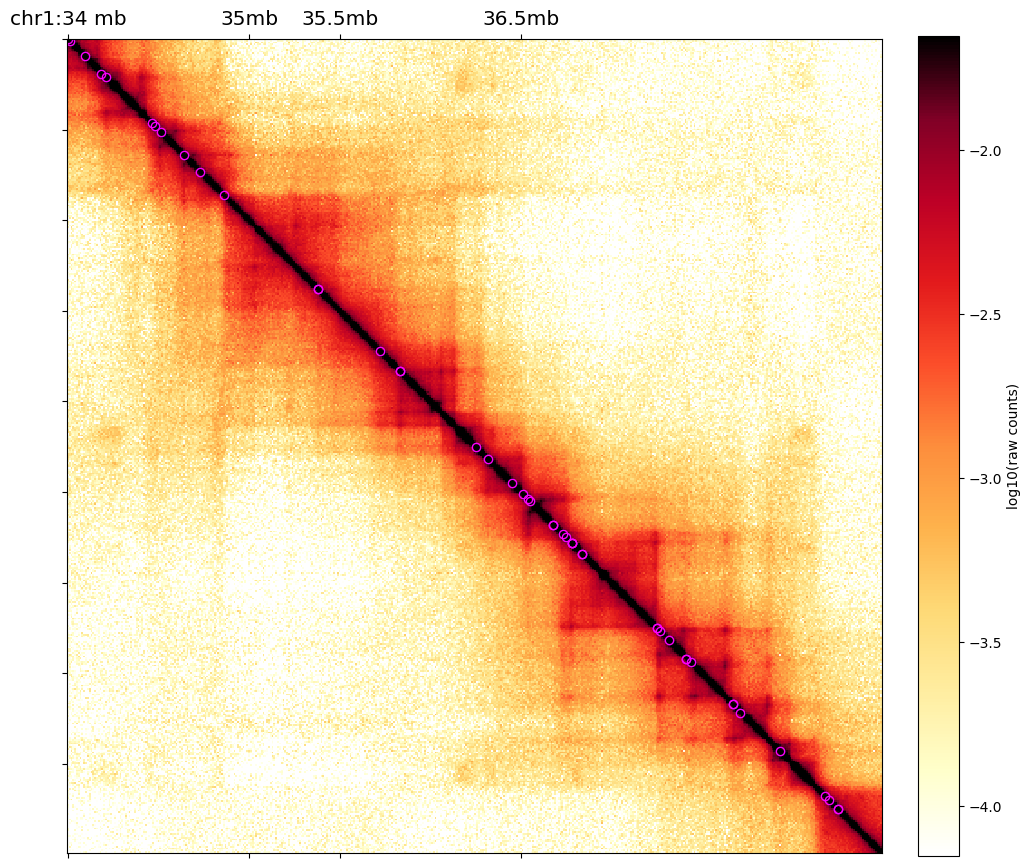

In [70]:
plt.figure(figsize=(11.5,11.5))

region = 'chr1:34000000-38500000'

cname = (cooler.Cooler(bonev_file+'::resolutions/'+str(res)).matrix(balance=True).fetch(region))
mat=cname
im = plt.matshow(np.log10(cname), 
                 vmax = np.log10(np.nanmedian(np.diag(mat,2))), 
                 vmin= np.log10(np.nanmedian(np.diag(mat,2)))-2.5, 
                 fignum=False ,cmap='fall' ); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.xticks([0,100,150, 250],fontsize=14.5)
#plt.yticks([0,100,200,300,400,500],fontsize=8.1)
plt.gca().set_xticklabels(['chr1:34 mb', '35mb', '35.5mb','36.5mb'])
#plt.gca().set_yticklabels(['34Mb', '34.25Mb', '0.5Mb','0.75Mb','1Mb', '1.25Mb'])#plt.gca().set_yticklabels([])
plt.gca().set_yticklabels([])
## plotting the dots ##
threshold=50

ctcf_filtered=peaks_motifs[peaks_motifs['strand']=='+']
ctcf_filtered = ctcf_filtered[ctcf_filtered['score']>threshold]
region_ctcf = bioframe.select(ctcf_filtered, region, cols=['chrom','start','end'])
for i in range(len(region_ctcf)):
    s,e = ((region_ctcf[['start','end']].iloc[i]
           -region_start)//res)
    plt.plot(  s,e,'o',lw=3.25,color=[.99,0,.99],mfc='none')
plt.plot(  s,e,'o',lw=3.25,color=[.99,0,.99],mfc='none',label='CTCFs')
plt.savefig('chrdomain.png')
plt.show()

In [49]:
ctcf_region = ctcf.query("chrom=='chr1' & start>= 34000000 & end<=35000000")
ctcf_region['mid']=(ctcf_region['start']+ctcf_region['end'])//2
ctcf_region

/tmp/SLURM_24088606/ipykernel_6632/14747972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctcf_region['mid']=(ctcf_region['start']+ctcf_region['end'])//2


chrom     start       end                 name      score  strand  \
264  chr1  34005641  34006016  CTCF_4reps_peak_406   57.35360     NaN   
265  chr1  34011003  34011576  CTCF_4reps_peak_407   81.03111     NaN   
266  chr1  34049624  34049965  CTCF_4reps_peak_408   17.84861     NaN   
267  chr1  34061128  34061524  CTCF_4reps_peak_409   66.27856     NaN   
268  chr1  34068201  34068742  CTCF_4reps_peak_411  111.66768     NaN   
269  chr1  34093645  34094093  CTCF_4reps_peak_412   95.51875     NaN   
270  chr1  34164669  34165075  CTCF_4reps_peak_415   70.71825     NaN   
271  chr1  34189897  34190469  CTCF_4reps_peak_417  141.79234     NaN   
272  chr1  34201505  34201841  CTCF_4reps_peak_418   38.75893     NaN   
273  chr1  34218271  34218763  CTCF_4reps_peak_420   82.96857     NaN   
274  chr1  34290841  34291181  CTCF_4reps_peak_421   18.99883     NaN   
275  chr1  34409903  34410235  CTCF_4reps_peak_423   37.74429     NaN   
276  chr1  34462785  34463309  CTCF_4reps_peak_426   91.75029     NaN   
277  chr1  34485827  34486306  CTCF_4reps_peak_428   97.17328     NaN   
278  chr1  34511016  34511486  CTCF_4reps_peak_430   91.91432     NaN   
279  chr1  34513125  34513421  CTCF_4reps_peak_431   21.83665     NaN   
280  chr1  34516030  34516381  CTCF_4reps_peak_432   26.15091     NaN   
281  chr1  34541176  34541605  CTCF_4reps_peak_433   44.30713     NaN   
282  chr1  34584067  34584377  CTCF_4reps_peak_435   38.32028     NaN   
283  chr1  34602289  34602757  CTCF_4reps_peak_437  101.63334     NaN   
284  chr1  34642425  34642894  CTCF_4reps_peak_438   89.04897     NaN   
285  chr1  34664847  34665177  CTCF_4reps_peak_439   31.54545     NaN   
286  chr1  34700640  34701074  CTCF_4reps_peak_440   87.39187     NaN   
287  chr1  34738325  34738953  CTCF_4reps_peak_441   97.67011     NaN   
288  chr1  34775558  34775872  CTCF_4reps_peak_442   40.43705     NaN   
289  chr1  34776438  34776816  CTCF_4reps_peak_443   28.64781     NaN   
290  chr1  34791788  34792095  CTCF_4reps_peak_444   17.90083     NaN   
291  chr1  34842551  34842983  CTCF_4reps_peak_447   33.47819     NaN   
292  chr1  34867104  34867657  CTCF_4reps_peak_448  115.02499     NaN   
293  chr1  34891624  34891895  CTCF_4reps_peak_449   15.56514     NaN   
294  chr1  34896902  34897282  CTCF_4reps_peak_451   37.74429     NaN   
295  chr1  34911989  34912347  CTCF_4reps_peak_452   20.12335     NaN   
296  chr1  34930074  34930419  CTCF_4reps_peak_453   21.08840     NaN   
297  chr1  34988249  34988616  CTCF_4reps_peak_457   33.88401     NaN   

          mid  
264  34005828  
265  34011289  
266  34049794  
267  34061326  
268  34068471  
269  34093869  
270  34164872  
271  34190183  
272  34201673  
273  34218517  
274  34291011  
275  34410069  
276  34463047  
277  34486066  
278  34511251  
279  34513273  
280  34516205  
281  34541390  
282  34584222  
283  34602523  
284  34642659  
285  34665012  
286  34700857  
287  34738639  
288  34775715  
289  34776627  
290  34791941  
291  34842767  
292  34867380  
293  34891759  
294  34897092  
295  34912168  
296  34930246  
297  34988432

In [53]:
ctcf_region['mid']//1000000

264    34
265    34
266    34
267    34
268    34
269    34
270    34
271    34
272    34
273    34
274    34
275    34
276    34
277    34
278    34
279    34
280    34
281    34
282    34
283    34
284    34
285    34
286    34
287    34
288    34
289    34
290    34
291    34
292    34
293    34
294    34
295    34
296    34
297    34
Name: mid, dtype: int64

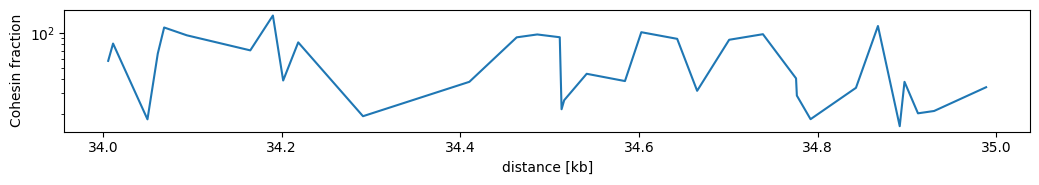

In [54]:



plt.figure(figsize = (10.5,1.95))

plt.plot(ctcf_region['mid']/1000000, ctcf_region['score'])



plt.ylabel('Cohesin fraction')
plt.yscale('log')
plt.xlabel('distance [kb]')
plt.tight_layout()
plt.show()

/tmp/SLURM_24088606/ipykernel_6632/122611940.py:7: RuntimeWarning: divide by zero encountered in log10
  im = plt.matshow(np.log10(cname),


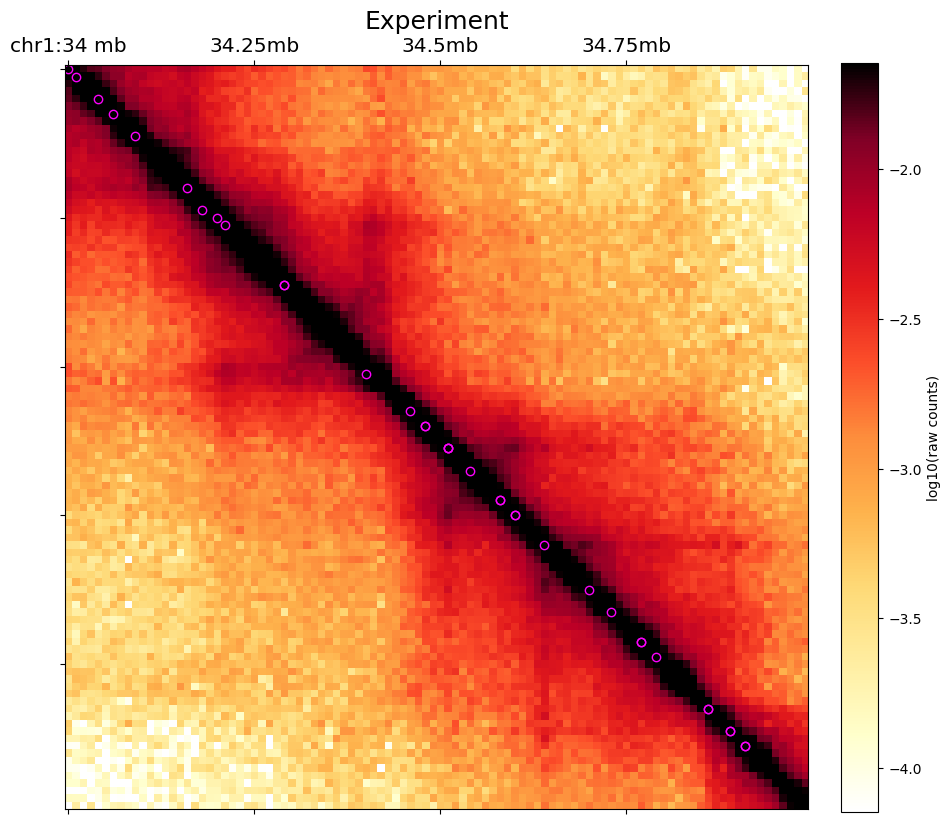

In [47]:
plt.figure(figsize=(10.5,10.5))

region = 'chr1:34000000-35000000'
res = 10000
cname = (cooler.Cooler(bonev_file+'::resolutions/'+str(res)).matrix(balance=True).fetch(region))
mat=cname
im = plt.matshow(np.log10(cname), 
                 vmax = np.log10(np.nanmedian(np.diag(mat,2))), 
                 vmin= np.log10(np.nanmedian(np.diag(mat,2)))-2.5, 
                 fignum=False ,cmap='fall' ); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.xticks([0,25,50, 75,100],fontsize=14.5)
#plt.yticks([0,100,200,300,400,500],fontsize=8.1)
plt.gca().set_xticklabels(['chr1:34 mb', '34.25mb', '34.5mb', '34.75mb','35mb'])
#plt.gca().set_yticklabels(['34Mb', '34.25Mb', '0.5Mb','0.75Mb','1Mb', '1.25Mb'])#plt.gca().set_yticklabels([])
plt.gca().set_yticklabels([])
## plotting the dots ##
threshold=0

#ctcf_filtered=peaks_motifs[peaks_motifs['strand']=='+']
region_ctcf = bioframe.select(peaks_motifs, region, cols=['chrom','start','end'])
for i in range(len(region_ctcf)):
    s,e = ((region_ctcf[['start','end']].iloc[i]
           -region_start)//res)
    plt.plot(  s,e,'o',lw=3.25,color=[.99,0,.99],mfc='none')
plt.plot(  s,e,'o',lw=3.25,color=[.99,0,.99],mfc='none',label='CTCFs')
plt.title('Experiment',fontsize = 18)
plt.savefig('chrdomain.png')
plt.show()

In [10]:
ctcf_path='/project/fudenber_735/collaborations/karissa_2022/2022_09_features_for_RNAseq/ChIP-seq_in_WT-parental-E14'

In [11]:
clr = bonev_cooler
ctcf = bioframe.read_table(ctcf_path+'/CTCF_peaks_called_on_4reps_foundInatLeast2reps_noBlacklist.bed', schema='bed').query(f'chrom in {clr.chromnames}')

RAD21=bioframe.read_table(ctcf_path+'/RAD21_peaks_called_on_6reps_foundInatLeast3reps_noBlacklist.bed', schema='bed').query(f'chrom in {clr.chromnames}')
ctcf['mid']=(ctcf.end+ctcf.start)/2
RAD21['mid']=(RAD21.end+RAD21.start)/2

In [12]:
ctcf

chrom      start        end                   name     score  strand  \
0      chr1    4142490    4142913      CTCF_4reps_peak_2  64.65743     NaN   
1      chr1    4332483    4332832      CTCF_4reps_peak_5  39.08555     NaN   
2      chr1    4346148    4346563      CTCF_4reps_peak_6  79.91960     NaN   
3      chr1    4416660    4417109      CTCF_4reps_peak_8  96.79732     NaN   
4      chr1    4491865    4492386      CTCF_4reps_peak_9  84.59853     NaN   
...     ...        ...        ...                    ...       ...     ...   
45834  chrX  168673401  168673773  CTCF_4reps_peak_69563  33.27952     NaN   
45835  chrX  169036508  169037081  CTCF_4reps_peak_69567  36.41209     NaN   
45836  chrX  169085920  169086223  CTCF_4reps_peak_69568  26.15091     NaN   
45837  chrY     872918     873242  CTCF_4reps_peak_69577  32.47781     NaN   
45838  chrY    1220044    1220381  CTCF_4reps_peak_69578  39.08555     NaN   

               mid  
0        4142701.5  
1        4332657.5  
2        4346355.5  
3        4416884.5  
4        4492125.5  
...            ...  
45834  168673587.0  
45835  169036794.5  
45836  169086071.5  
45837     873080.0  
45838    1220212.5  

[45839 rows x 7 columns]

/tmp/SLURM_24088606/ipykernel_6632/4005330994.py:10: RuntimeWarning: divide by zero encountered in log10
  im = plt.matshow(np.log10(cname),


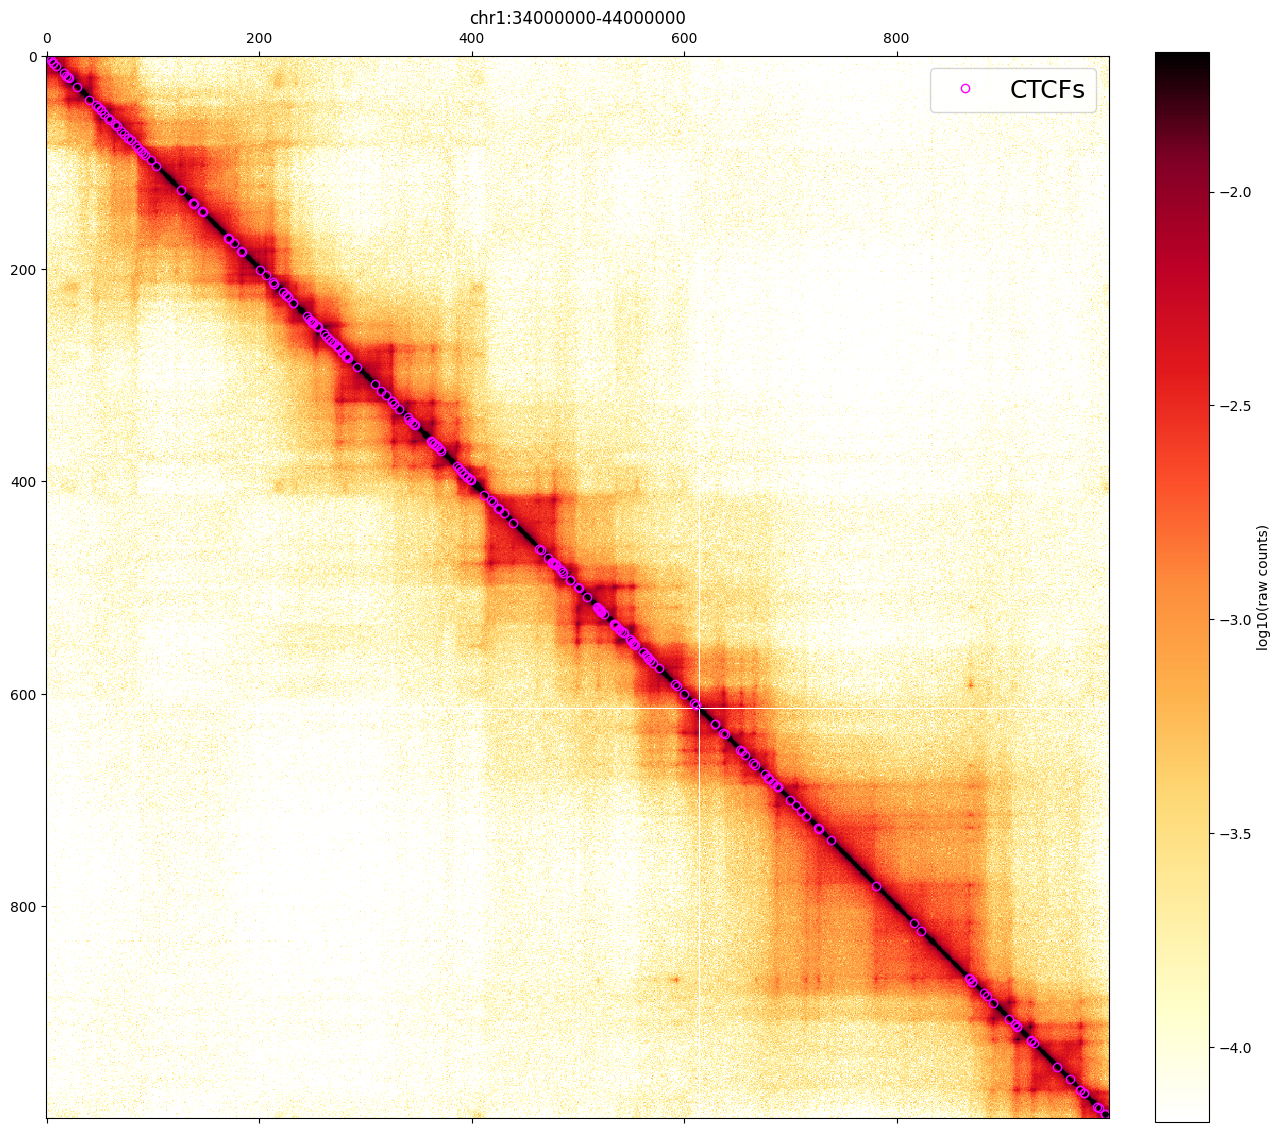

In [14]:
%matplotlib inline
plt.figure(figsize=(15,15))

region = 'chr1:34000000-44000000'

region_start=bioframe.parse_region_string(region)[1]
#mcool_path =  cooler_prefix + sample_dict['WT']
cname = (cooler.Cooler(bonev_file+'::resolutions/'+str(res)).matrix(balance=True).fetch(region))
mat = cname
im = plt.matshow(np.log10(cname), 
                 vmax = np.log10(np.nanmedian(np.diag(mat,2))), 
                 vmin= np.log10(np.nanmedian(np.diag(mat,2)))-2.5, 
                 fignum=False ,cmap='fall' ); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')

## plotting the dots ##
threshold=0
ctcf_filtered=ctcf[ctcf['score']>threshold]
region_ctcf = bioframe.select(ctcf_filtered, region, cols=['chrom','start','end'])
for i in range(len(region_ctcf)):
    s,e = ((region_ctcf[['start','end']].iloc[i]
           -region_start)//res)
    plt.plot(  s,e,'o',lw=3.25,color=[.99,0,.99],mfc='none')
plt.plot(  s,e,'o',lw=3.25,color=[.99,0,.99],mfc='none',label='CTCFs')
plt.legend(fontsize = 18)
plt.grid(False)
plt.title(region)
plt.savefig('domain_with_ctcfs.png')
plt.show()

In [28]:
len(region_ctcf)

228

/tmp/SLURM_23982858/ipykernel_23663/3295808629.py:10: RuntimeWarning: divide by zero encountered in log10
  im = plt.matshow(np.log10(cname),


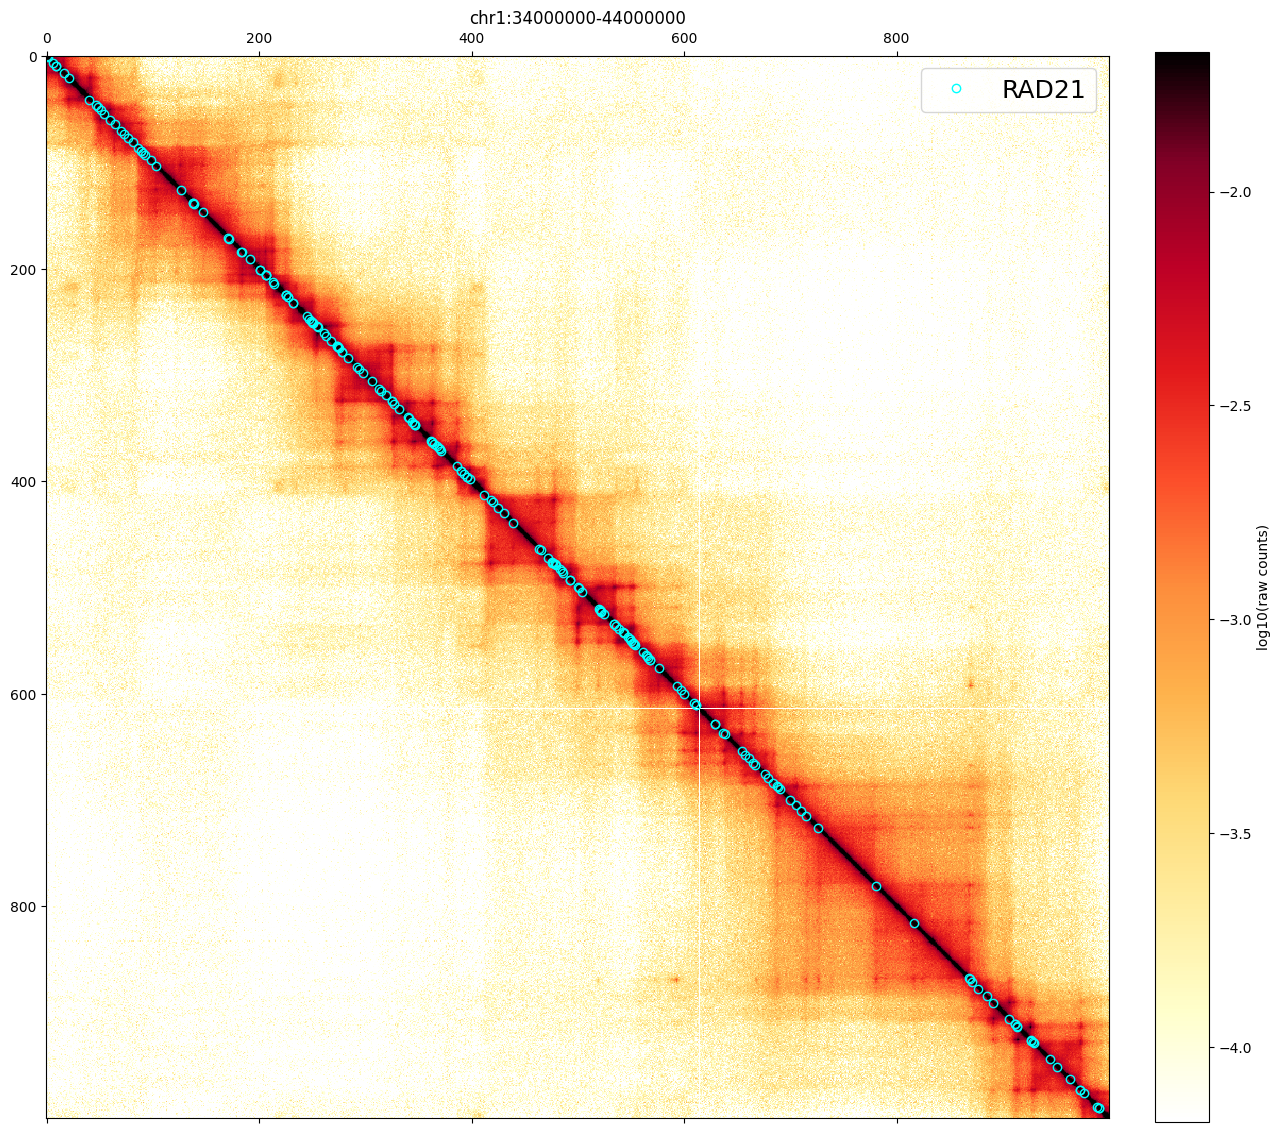

In [48]:
%matplotlib inline
plt.figure(figsize=(15,15))

region = 'chr1:34000000-44000000'

region_start=bioframe.parse_region_string(region)[1]
#mcool_path =  cooler_prefix + sample_dict['WT']
cname = (cooler.Cooler(bonev_file+'::resolutions/'+str(res)).matrix(balance=True).fetch(region))
mat = cname
im = plt.matshow(np.log10(cname), 
                 vmax = np.log10(np.nanmedian(np.diag(mat,2))), 
                 vmin= np.log10(np.nanmedian(np.diag(mat,2)))-2.5, 
                 fignum=False ,cmap='fall' ); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')

## plotting the dots ##
threshold=0
RAD21_filtered=RAD21[RAD21['score']>threshold]
region_RAD21 = bioframe.select(RAD21_filtered, region, cols=['chrom','start','end'])
for i in range(len(region_RAD21)):
    s,e = ((region_RAD21[['start','end']].iloc[i]
           -region_start)//res)
    plt.plot(  s,e,'o',lw=3.25,color='cyan',mfc='none')

plt.plot(  s,e,'o',lw=3.25,color='cyan',mfc='none',label='RAD21')
plt.legend(fontsize = 18)
plt.grid(False)
plt.title(region)
plt.savefig('domain_with_RAD21.png')
plt.show()

In [31]:
len(region_RAD21)

202